In [1]:
import pandas as pd
import numpy as np

# Définir les noms de colonnes (le fichier n'a pas d'en-têtes)
columns = ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
          [f'sensor_{i}' for i in range(1, 22)]

# Charger train_FD001.txt
train_df = pd.read_csv('../data/train_FD001.txt', sep='\s+', header=None, names=columns)

# Premières lignes
print("=== APERÇU DES DONNÉES ===")
print(train_df.head(10))

print("\n=== DIMENSIONS ===")
print(f"Lignes: {train_df.shape[0]}, Colonnes: {train_df.shape[1]}")

print("\n=== NOMBRE DE MOTEURS ===")
print(f"Moteurs uniques: {train_df['unit_number'].nunique()}")

print("\n=== DURÉE DE VIE PAR MOTEUR ===")
rul_per_engine = train_df.groupby('unit_number')['time_in_cycles'].max()
print(rul_per_engine.describe())

=== APERÇU DES DONNÉES ===
   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1       -0.0007       -0.0004         100.0   
1            1               2        0.0019       -0.0003         100.0   
2            1               3       -0.0043        0.0003         100.0   
3            1               4        0.0007        0.0000         100.0   
4            1               5       -0.0019       -0.0002         100.0   
5            1               6       -0.0043       -0.0001         100.0   
6            1               7        0.0010        0.0001         100.0   
7            1               8       -0.0034        0.0003         100.0   
8            1               9        0.0008        0.0001         100.0   
9            1              10       -0.0033        0.0001         100.0   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  \
0    518.67    641.82   1589.70   1400.60     14.62  ...     521.

In [2]:
print("=== DIMENSIONS ===")
print(f"Lignes: {train_df.shape[0]}, Colonnes: {train_df.shape[1]}")

print("\n=== NOMBRE DE MOTEURS ===")
print(f"Moteurs uniques: {train_df['unit_number'].nunique()}")

print("\n=== DURÉE DE VIE PAR MOTEUR ===")
rul_per_engine = train_df.groupby('unit_number')['time_in_cycles'].max()
print(rul_per_engine.describe())

=== DIMENSIONS ===
Lignes: 20631, Colonnes: 26

=== NOMBRE DE MOTEURS ===
Moteurs uniques: 100

=== DURÉE DE VIE PAR MOTEUR ===
count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_in_cycles, dtype: float64


In [3]:
# Calculer le RUL pour chaque ligne
# RUL = max_cycle_du_moteur - cycle_actuel

max_cycles = train_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycle']

train_df = train_df.merge(max_cycles, on='unit_number')
train_df['RUL'] = train_df['max_cycle'] - train_df['time_in_cycles']

# Vérification
print("=== RUL AJOUTÉ ===")
print(train_df[['unit_number', 'time_in_cycles', 'max_cycle', 'RUL']].head(15))

print("\n=== DISTRIBUTION DU RUL ===")
print(train_df['RUL'].describe())

=== RUL AJOUTÉ ===
    unit_number  time_in_cycles  max_cycle  RUL
0             1               1        192  191
1             1               2        192  190
2             1               3        192  189
3             1               4        192  188
4             1               5        192  187
5             1               6        192  186
6             1               7        192  185
7             1               8        192  184
8             1               9        192  183
9             1              10        192  182
10            1              11        192  181
11            1              12        192  180
12            1              13        192  179
13            1              14        192  178
14            1              15        192  177

=== DISTRIBUTION DU RUL ===
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RU

In [4]:
# Statistiques des capteurs
sensor_cols = [col for col in train_df.columns if col.startswith('sensor_')]

print("=== VARIANCE DES CAPTEURS ===")
sensor_stats = train_df[sensor_cols].describe().T[['mean', 'std', 'min', 'max']]
sensor_stats['variance'] = train_df[sensor_cols].var()
print(sensor_stats.round(2))

print("\n=== CAPTEURS À VARIANCE NULLE OU QUASI-NULLE ===")
low_variance = sensor_stats[sensor_stats['variance'] < 0.01]
print(low_variance)

=== VARIANCE DES CAPTEURS ===
              mean    std      min      max  variance
sensor_1    518.67   0.00   518.67   518.67      0.00
sensor_2    642.68   0.50   641.21   644.53      0.25
sensor_3   1590.52   6.13  1571.04  1616.91     37.59
sensor_4   1408.93   9.00  1382.25  1441.49     81.01
sensor_5     14.62   0.00    14.62    14.62      0.00
sensor_6     21.61   0.00    21.60    21.61      0.00
sensor_7    553.37   0.89   549.85   556.06      0.78
sensor_8   2388.10   0.07  2387.90  2388.56      0.01
sensor_9   9065.24  22.08  9021.73  9244.59    487.65
sensor_10     1.30   0.00     1.30     1.30      0.00
sensor_11    47.54   0.27    46.85    48.53      0.07
sensor_12   521.41   0.74   518.69   523.38      0.54
sensor_13  2388.10   0.07  2387.88  2388.56      0.01
sensor_14  8143.75  19.08  8099.94  8293.72    363.90
sensor_15     8.44   0.04     8.32     8.58      0.00
sensor_16     0.03   0.00     0.03     0.03      0.00
sensor_17   393.21   1.55   388.00   400.00      2.4

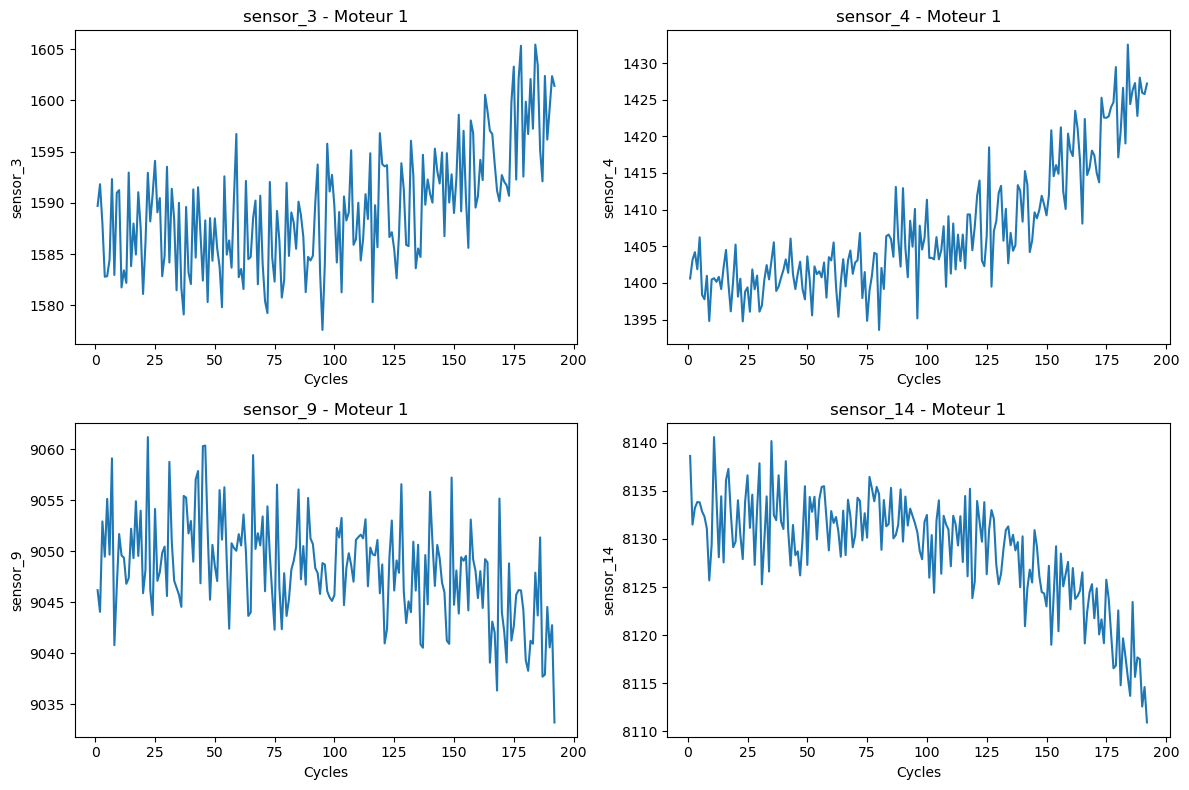

Graphique sauvegardé dans data/sensor_degradation.png


In [5]:
import matplotlib.pyplot as plt

# Sélectionner un moteur
engine_id = 1
engine_data = train_df[train_df['unit_number'] == engine_id]

# Capteurs utiles à visualiser
useful_sensors = ['sensor_3', 'sensor_4', 'sensor_9', 'sensor_14']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, sensor in enumerate(useful_sensors):
    axes[i].plot(engine_data['time_in_cycles'], engine_data[sensor])
    axes[i].set_xlabel('Cycles')
    axes[i].set_ylabel(sensor)
    axes[i].set_title(f'{sensor} - Moteur {engine_id}')

plt.tight_layout()
plt.savefig('../data/sensor_degradation.png')
plt.show()

print("Graphique sauvegardé dans data/sensor_degradation.png")

In [6]:
# Feature Engineering : Rolling statistics (moyennes mobiles)

# On travaille moteur par moteur
def add_rolling_features(df, window=5):
    sensor_cols = ['sensor_3', 'sensor_4', 'sensor_9', 'sensor_14', 
                   'sensor_7', 'sensor_11', 'sensor_12', 'sensor_17', 'sensor_20', 'sensor_21']
    
    for sensor in sensor_cols:
        # Moyenne mobile
        df[f'{sensor}_rolling_mean'] = df.groupby('unit_number')[sensor].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )
        # Écart-type mobile (mesure de volatilité)
        df[f'{sensor}_rolling_std'] = df.groupby('unit_number')[sensor].transform(
            lambda x: x.rolling(window=window, min_periods=1).std()
        )
    
    return df

train_df = add_rolling_features(train_df, window=5)

print("=== NOUVELLES COLONNES ===")
new_cols = [col for col in train_df.columns if 'rolling' in col]
print(f"Nombre de features ajoutées: {len(new_cols)}")
print(new_cols[:10])

print(f"\n=== DIMENSIONS FINALES ===")
print(f"Lignes: {train_df.shape[0]}, Colonnes: {train_df.shape[1]}")

=== NOUVELLES COLONNES ===
Nombre de features ajoutées: 20
['sensor_3_rolling_mean', 'sensor_3_rolling_std', 'sensor_4_rolling_mean', 'sensor_4_rolling_std', 'sensor_9_rolling_mean', 'sensor_9_rolling_std', 'sensor_14_rolling_mean', 'sensor_14_rolling_std', 'sensor_7_rolling_mean', 'sensor_7_rolling_std']

=== DIMENSIONS FINALES ===
Lignes: 20631, Colonnes: 48


In [7]:
# Préparer X (features) et y (target)

# Colonnes à exclure
exclude_cols = ['unit_number', 'time_in_cycles', 'max_cycle', 'RUL']

# Capteurs inutiles (variance nulle)
useless_sensors = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 
                   'sensor_16', 'sensor_18', 'sensor_19']

# Features à utiliser
feature_cols = [col for col in train_df.columns 
                if col not in exclude_cols and col not in useless_sensors]

X = train_df[feature_cols]
y = train_df['RUL']

print("=== FEATURES SÉLECTIONNÉES ===")
print(f"Nombre de features: {len(feature_cols)}")
print(feature_cols)

print(f"\n=== DIMENSIONS ===")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

# Vérifier les valeurs manquantes
print(f"\n=== VALEURS MANQUANTES ===")
print(f"Total NaN dans X: {X.isna().sum().sum()}")

=== FEATURES SÉLECTIONNÉES ===
Nombre de features: 37
['op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'sensor_3_rolling_mean', 'sensor_3_rolling_std', 'sensor_4_rolling_mean', 'sensor_4_rolling_std', 'sensor_9_rolling_mean', 'sensor_9_rolling_std', 'sensor_14_rolling_mean', 'sensor_14_rolling_std', 'sensor_7_rolling_mean', 'sensor_7_rolling_std', 'sensor_11_rolling_mean', 'sensor_11_rolling_std', 'sensor_12_rolling_mean', 'sensor_12_rolling_std', 'sensor_17_rolling_mean', 'sensor_17_rolling_std', 'sensor_20_rolling_mean', 'sensor_20_rolling_std', 'sensor_21_rolling_mean', 'sensor_21_rolling_std']

=== DIMENSIONS ===
X: (20631, 37)
y: (20631,)

=== VALEURS MANQUANTES ===
Total NaN dans X: 1000


In [8]:
# Remplacer les NaN par 0
X = X.fillna(0)

print(f"NaN après correction: {X.isna().sum().sum()}")

# Sauvegarder pour vérification
print(f"\n=== APERÇU X ===")
print(X.head())

NaN après correction: 0

=== APERÇU X ===
   op_setting_1  op_setting_2  op_setting_3  sensor_2  sensor_3  sensor_4  \
0       -0.0007       -0.0004         100.0    641.82   1589.70   1400.60   
1        0.0019       -0.0003         100.0    642.15   1591.82   1403.14   
2       -0.0043        0.0003         100.0    642.35   1587.99   1404.20   
3        0.0007        0.0000         100.0    642.35   1582.79   1401.87   
4       -0.0019       -0.0002         100.0    642.37   1582.85   1406.22   

   sensor_7  sensor_8  sensor_9  sensor_11  ...  sensor_11_rolling_mean  \
0    554.36   2388.06   9046.19      47.47  ...                  47.470   
1    553.75   2388.04   9044.07      47.49  ...                  47.480   
2    554.26   2388.08   9052.94      47.27  ...                  47.410   
3    554.45   2388.11   9049.48      47.13  ...                  47.340   
4    554.00   2388.06   9055.15      47.28  ...                  47.328   

   sensor_11_rolling_std  sensor_12_rolling_

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]} lignes")
print(f"Test: {X_test.shape[0]} lignes")

# Entraîner Random Forest
print("\nEntraînement en cours...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== PERFORMANCE DU MODÈLE ===")
print(f"MAE (Mean Absolute Error): {mae:.2f} cycles")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} cycles")
print(f"R² Score: {r2:.4f}")

Train: 16504 lignes
Test: 4127 lignes

Entraînement en cours...

=== PERFORMANCE DU MODÈLE ===
MAE (Mean Absolute Error): 24.99 cycles
RMSE (Root Mean Squared Error): 36.08 cycles
R² Score: 0.7151


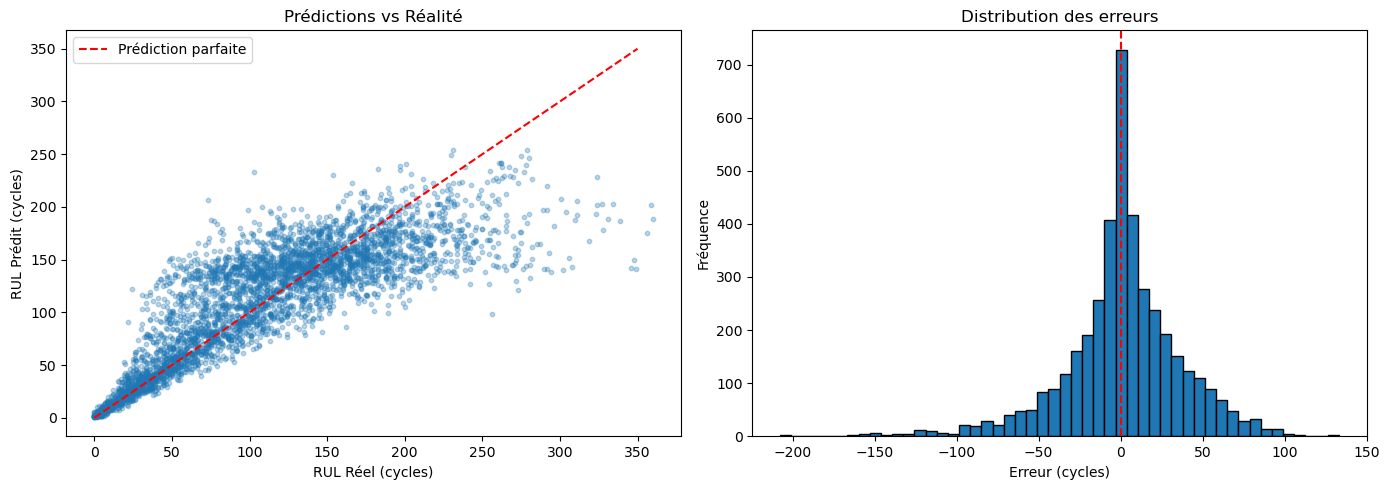

Erreur médiane: 1.51 cycles
90% des erreurs entre -61 et 59 cycles


In [10]:
# Visualisation prédictions vs réalité
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test, y_pred, alpha=0.3, s=10)
axes[0].plot([0, 350], [0, 350], 'r--', label='Prédiction parfaite')
axes[0].set_xlabel('RUL Réel (cycles)')
axes[0].set_ylabel('RUL Prédit (cycles)')
axes[0].set_title('Prédictions vs Réalité')
axes[0].legend()

# Distribution des erreurs
errors = y_pred - y_test
axes[1].hist(errors, bins=50, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Erreur (cycles)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution des erreurs')

plt.tight_layout()
plt.savefig('../data/model_performance.png')
plt.show()

print(f"Erreur médiane: {np.median(errors):.2f} cycles")
print(f"90% des erreurs entre {np.percentile(errors, 5):.0f} et {np.percentile(errors, 95):.0f} cycles")

=== TOP 15 FEATURES ===
                   feature  importance
19   sensor_4_rolling_mean    0.510077
21   sensor_9_rolling_mean    0.089567
35  sensor_21_rolling_mean    0.079965
27  sensor_11_rolling_mean    0.057653
23  sensor_14_rolling_mean    0.030890
25   sensor_7_rolling_mean    0.018702
29  sensor_12_rolling_mean    0.016656
17   sensor_3_rolling_mean    0.012624
33  sensor_20_rolling_mean    0.011683
24   sensor_14_rolling_std    0.010514
36   sensor_21_rolling_std    0.009712
18    sensor_3_rolling_std    0.009694
8                 sensor_9    0.009582
26    sensor_7_rolling_std    0.009368
30   sensor_12_rolling_std    0.009309


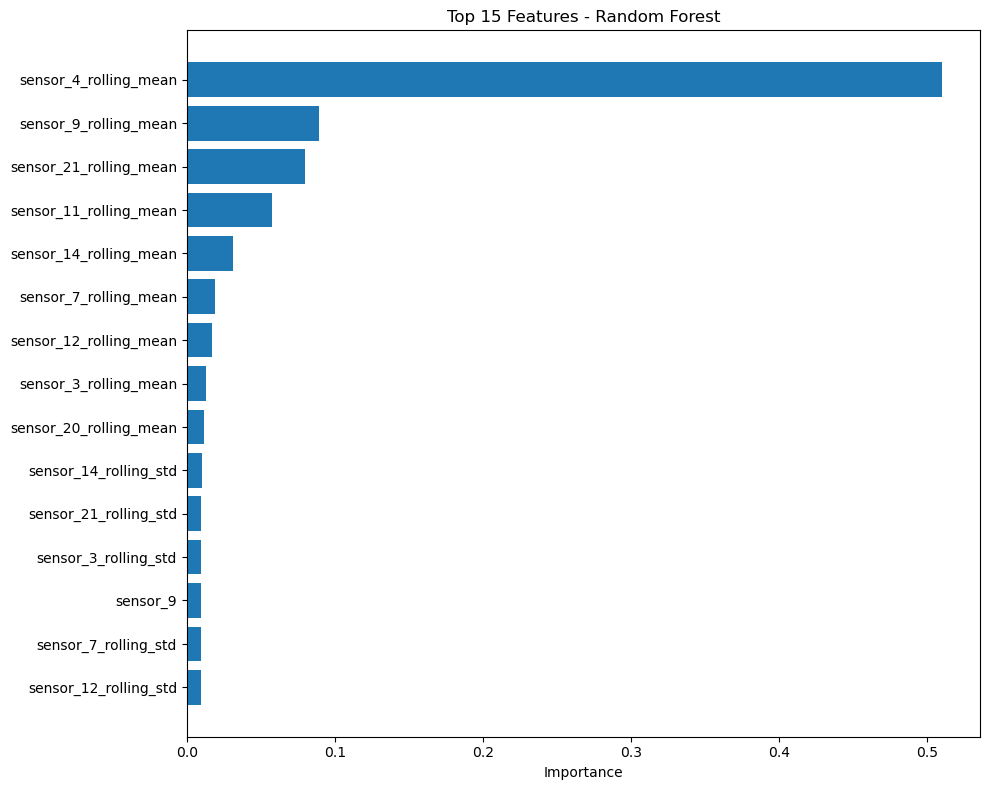

In [11]:
# Importance des features
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("=== TOP 15 FEATURES ===")
print(feature_importance.head(15))

# Visualisation
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'].head(15)[::-1], 
         feature_importance['importance'].head(15)[::-1])
plt.xlabel('Importance')
plt.title('Top 15 Features - Random Forest')
plt.tight_layout()
plt.savefig('../data/feature_importance.png')
plt.show()

In [12]:
# RUL Capping à 125 cycles
RUL_CAP = 125

y_capped = y.clip(upper=RUL_CAP)

print(f"=== AVANT CAPPING ===")
print(f"RUL max: {y.max()}")
print(f"RUL > 125: {(y > 125).sum()} lignes")

print(f"\n=== APRÈS CAPPING ===")
print(f"RUL max: {y_capped.max()}")
print(f"Distribution:")
print(y_capped.describe())

=== AVANT CAPPING ===
RUL max: 361
RUL > 125: 8031 lignes

=== APRÈS CAPPING ===
RUL max: 125
Distribution:
count    20631.000000
mean        86.829286
std         41.673699
min          0.000000
25%         51.000000
50%        103.000000
75%        125.000000
max        125.000000
Name: RUL, dtype: float64


Entraînement avec RUL cappé...

=== PERFORMANCE AVEC RUL CAPPÉ ===
MAE: 11.42 cycles (avant: 24.99)
RMSE: 16.38 cycles (avant: 36.08)
R²: 0.8419 (avant: 0.7151)


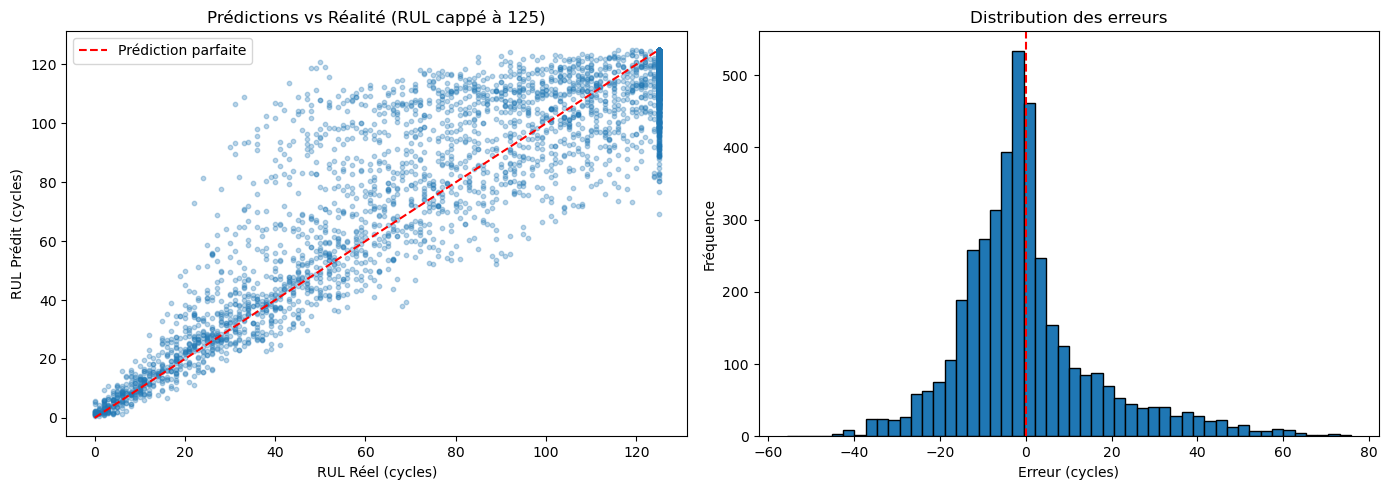


Erreur médiane: -1.90 cycles
90% des erreurs entre -23 et 34 cycles


In [13]:
# Réentraîner avec RUL cappé
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_capped, test_size=0.2, random_state=42)

print("Entraînement avec RUL cappé...")
rf_model_capped = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model_capped.fit(X_train_c, y_train_c)

# Prédictions
y_pred_c = rf_model_capped.predict(X_test_c)

# Métriques
mae_c = mean_absolute_error(y_test_c, y_pred_c)
rmse_c = np.sqrt(mean_squared_error(y_test_c, y_pred_c))
r2_c = r2_score(y_test_c, y_pred_c)

print("\n=== PERFORMANCE AVEC RUL CAPPÉ ===")
print(f"MAE: {mae_c:.2f} cycles (avant: 24.99)")
print(f"RMSE: {rmse_c:.2f} cycles (avant: 36.08)")
print(f"R²: {r2_c:.4f} (avant: 0.7151)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_test_c, y_pred_c, alpha=0.3, s=10)
axes[0].plot([0, 125], [0, 125], 'r--', label='Prédiction parfaite')
axes[0].set_xlabel('RUL Réel (cycles)')
axes[0].set_ylabel('RUL Prédit (cycles)')
axes[0].set_title('Prédictions vs Réalité (RUL cappé à 125)')
axes[0].legend()

errors_c = y_pred_c - y_test_c
axes[1].hist(errors_c, bins=50, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Erreur (cycles)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution des erreurs')

plt.tight_layout()
plt.savefig('../data/model_performance_capped.png')
plt.show()

print(f"\nErreur médiane: {np.median(errors_c):.2f} cycles")
print(f"90% des erreurs entre {np.percentile(errors_c, 5):.0f} et {np.percentile(errors_c, 95):.0f} cycles")